In [ ]:
import json
import numpy as np
import networkx as nx
import torch
import pandas as pd

In [ ]:
with open('dict_bands_graph1.txt', 'r') as file:
  dict = json.load(file)

In [ ]:
dict

{'1': {'0': {'1': [104924.20477701823,
    13013.901957448323,
    1769.5989138285317,
    841.9932448267937],
   '2': [134873.96069539388,
    9585.934318288168,
    1683.4212280273437,
    842.2816827495892],
   '3': [67030.91232503255,
    3455.0856164296465,
    832.8319717407227,
    438.85613816181814],
   '4': [93344.7616394043,
    3962.6912532806396,
    1056.9829420725505,
    1105.9127834637961],
   '5': [114624.91194661458,
    15107.078306070964,
    2266.31742032369,
    1152.6189609368641],
   '6': [90893.94803873698,
    6571.763980102539,
    1448.0632934570312,
    796.8254897435506],
   '7': [117613.68638102213,
    4980.889621988932,
    1296.9337227503459,
    733.256007830302],
   '8': [37071.51417592367,
    1656.0014593760172,
    579.9609041213989,
    493.04917927583057],
   '9': [74632.66999104818,
    8651.23289972941,
    1387.751416269938,
    525.3589161713918],
   '10': [163558.32602945963,
    12023.40770924886,
    1922.7585170110067,
    756.817729943

In [ ]:
bands=['delta', 'theta', 'alpha', 'beta']

In [ ]:
cpc4=[340, 357, 369, 403, 441, 493, 551, 579, 597]
cpc2=[6, 10, 16, 17, 30, 39, 52, 60, 84, 93, 99, 102, 123, 135, 148, 150, 160, 191, 199, 212, 220, 228, 234, 257, 280, 302, 303, 313, 314, 320, 344, 362, 363, 404, 435, 448, 468, 511, 524, 545, 571, 582, 598, 600]
cpc1=[0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 18, 23, 26, 27, 28, 31, 33, 38, 41, 43, 49, 58, 62, 66, 68, 74, 79, 81, 82, 83, 85, 91, 95, 101, 103, 106, 107, 111, 116, 118, 121, 122, 127, 128, 133, 136, 137, 141, 144, 151, 152, 155, 157, 158, 161, 162, 164, 180, 194, 195, 197, 200, 202, 205, 206, 208, 216, 221, 222, 223, 227, 229, 231, 232, 235, 238, 240, 248, 253, 254, 255, 261, 264, 266, 275, 276, 279, 281, 282, 284, 286, 295, 304, 305, 307, 309, 310, 315, 317, 322, 327, 331, 333, 336, 339, 345, 346, 351, 358, 360, 361, 364, 367, 371, 372, 374, 375, 383, 384, 395, 396, 399, 413, 414, 416, 421, 422, 425, 426, 428, 431, 436, 439, 442, 444, 446, 449, 450, 451, 453, 454, 456, 460, 461, 463, 466, 469, 478, 482, 486, 488, 491, 501, 508, 509, 515, 521, 526, 528, 529, 535, 540, 541, 543, 544, 546, 555, 560, 568, 575, 581, 586, 587, 590, 604, 605]
cpc3=[21, 47, 76, 179, 181, 183, 203, 215, 236, 262, 267, 311, 341, 373, 391, 434, 443, 527, 547, 561]
cpc5=[19, 20, 22, 24, 25, 29, 32, 34, 35, 36, 37, 40, 42, 44, 45, 46, 48, 50, 51, 53, 54, 55, 56, 57, 59, 61, 63, 64, 65, 67, 69, 70, 71, 72, 73, 75, 77, 78, 80, 86, 87, 88, 89, 90, 92, 94, 96, 97, 98, 100, 104, 105, 108, 109, 110, 112, 113, 114, 115, 117, 119, 120, 124, 125, 126, 129, 130, 131, 132, 134, 138, 139, 140, 142, 143, 145, 146, 147, 149, 153, 154, 156, 159, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 182, 184, 185, 186, 187, 188, 189, 190, 192, 193, 196, 198, 201, 204, 207, 209, 210, 211, 213, 214, 217, 218, 219, 224, 225, 226, 230, 233, 237, 239, 241, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 256, 258, 259, 260, 263, 265, 268, 269, 270, 271, 272, 273, 274, 277, 278, 283, 285, 287, 288, 289, 290, 291, 292, 293, 294, 296, 297, 298, 299, 300, 301, 306, 308, 312, 316, 318, 319, 321, 323, 324, 325, 326, 328, 329, 330, 332, 334, 335, 337, 338, 342, 343, 347, 348, 349, 350, 352, 353, 354, 355, 356, 359, 365, 366, 368, 370, 376, 377, 378, 379, 380,381, 382, 385, 386, 387, 388, 389, 390, 392, 393, 394, 397, 398, 400, 401, 402, 405, 406, 407, 408, 409, 410, 411, 412, 415, 417, 418, 419, 420, 423, 424, 427, 429, 430, 432, 433, 437, 438, 440, 445, 447, 452, 455, 457, 458, 459, 462, 464, 465, 467, 470, 471, 472, 473, 474, 475, 476, 477, 479, 480, 481, 483, 484, 485, 487, 489, 490, 492, 494, 495, 496, 497, 498, 499, 500, 502, 503, 504, 505, 506, 507, 510, 512, 513, 514, 516, 517, 518, 519, 520, 522, 523, 525, 530, 531, 532, 533, 534, 536, 537, 538, 539, 542, 548, 549, 550, 552, 553, 554, 556, 557, 558, 559, 562, 563, 564, 565, 566, 567, 569, 570, 572, 573, 574, 576, 577, 578, 580, 583, 584, 585, 588, 589, 591, 592, 593, 594, 595, 596, 599, 601, 602, 603]


In [ ]:
def find_cpc(pno):
  if pno in cpc1:
    return "1"
  elif pno in cpc2:
    return "2"
  elif pno in cpc3:
    return "3"
  elif pno in cpc4:
    return "4"
  else:
    return "5"

In [ ]:
!pip install torch_geometric
from torch_geometric.data import Data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00


In [ ]:
list_of_nodes=[]
for i in bands:
    for j in range(1,19):
      txt=i+'_'+str(j)
      list_of_nodes.append(txt)
list_of_nodes

['delta_1',
 'delta_2',
 'delta_3',
 'delta_4',
 'delta_5',
 'delta_6',
 'delta_7',
 'delta_8',
 'delta_9',
 'delta_10',
 'delta_11',
 'delta_12',
 'delta_13',
 'delta_14',
 'delta_15',
 'delta_16',
 'delta_17',
 'delta_18',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4',
 'theta_5',
 'theta_6',
 'theta_7',
 'theta_8',
 'theta_9',
 'theta_10',
 'theta_11',
 'theta_12',
 'theta_13',
 'theta_14',
 'theta_15',
 'theta_16',
 'theta_17',
 'theta_18',
 'alpha_1',
 'alpha_2',
 'alpha_3',
 'alpha_4',
 'alpha_5',
 'alpha_6',
 'alpha_7',
 'alpha_8',
 'alpha_9',
 'alpha_10',
 'alpha_11',
 'alpha_12',
 'alpha_13',
 'alpha_14',
 'alpha_15',
 'alpha_16',
 'alpha_17',
 'alpha_18',
 'beta_1',
 'beta_2',
 'beta_3',
 'beta_4',
 'beta_5',
 'beta_6',
 'beta_7',
 'beta_8',
 'beta_9',
 'beta_10',
 'beta_11',
 'beta_12',
 'beta_13',
 'beta_14',
 'beta_15',
 'beta_16',
 'beta_17',
 'beta_18']

In [ ]:
band_dict={"alpha":2,"beta":3,"theta":1,"delta":0}

In [ ]:
#trying with edge weights and different edges
def create_graph(pno):
  graph = nx.DiGraph()
  for i in bands:
    for j in range(1,19):
      txt=i+str(j)
      graph.add_node(txt)
  cpc=find_cpc(pno)
  pno=str(pno)
  for s in range(len(list_of_nodes)):
    for t in range(s+1,len(list_of_nodes)):
      a1=list_of_nodes[s].split('_')
      k1=a1[1]
      #print(k1,type(k1))
      l1=a1[0]
      l1=band_dict[l1]
      a2=list_of_nodes[t].split('_')
      k2=a2[1] #num
      l2=a2[0] #band
      l2=band_dict[l2]
      if(dict[cpc][pno][k1][l1]>=dict[cpc][pno][k2][l2]):
        graph.add_edge(list_of_nodes[s],list_of_nodes[t],weight=dict[cpc][pno][k1][l1]/(dict[cpc][pno][k2][l2]+0.000001))

  #creating the data object
  lx=[]
  for i in range(1,19):
    for j in range(4):
      lx.append([dict[cpc][str(pno)][str(i)][j]])
  #lx=[[dict[cpc][str(pno)][]],[dict[cpc]["beta"][str(pno)]],[dict[cpc]["theta"][str(pno)]],[dict[cpc]["delta"][str(pno)]]]
  lx=np.array(lx)

  x=torch.tensor(lx,dtype=torch.float)


  #x = torch.randn(4, 10)
  edge_attrs = nx.get_edge_attributes(graph, "weight")
  cpc_arr=int(cpc)-1
  #print(cpc_arr)
  y = torch.tensor([cpc_arr], dtype=torch.long)
  #print(y)
  l=list(edge_attrs.values())
  edge_weight=[]
  for i in l:
    edge_weight.append([i])
  edge_weight=np.array(edge_weight)
  edge_weight = torch.tensor(edge_weight, dtype=torch.float)
  fromlist=[]
  tolist=[]
  for line in nx.generate_edgelist(graph):
    fromlist.append(list_of_nodes.index(line.split(' ')[0]))
    tolist.append(list_of_nodes.index(line.split(' ')[1]))
  #print(fromlist)
  final=[fromlist,tolist]
  final=np.array(final)
  edgelist=torch.tensor(final)

  data = Data(x=x, edge_weight=edge_weight, edge_index=edgelist, y=y)
  newlist.append(data)
  return graph

In [ ]:
graphs=[]
newlist=[]
for i in range(606):
  graphs.append(create_graph(i))


In [ ]:
 for line in nx.generate_edgelist(graphs[3]):
  print(line)

delta_1 delta_2 {'weight': 1.5854720623559058}
delta_1 delta_3 {'weight': 1.0877935300863268}
delta_1 delta_4 {'weight': 7.0300967935444385}
delta_1 delta_6 {'weight': 1.8290830739785249}
delta_1 delta_7 {'weight': 2.2873650948476576}
delta_1 delta_8 {'weight': 1.92449650944108}
delta_1 delta_11 {'weight': 1.8500688783422659}
delta_1 delta_12 {'weight': 22.258851119258747}
delta_1 delta_13 {'weight': 1.357422968149678}
delta_1 delta_15 {'weight': 2.746230706686439}
delta_1 delta_16 {'weight': 4.036123679141117}
delta_1 delta_18 {'weight': 2.03536022255544}
delta_1 theta_1 {'weight': 25.12925368050713}
delta_1 theta_2 {'weight': 29.64981045339507}
delta_1 theta_3 {'weight': 21.968542766929055}
delta_1 theta_4 {'weight': 81.81688570703646}
delta_1 theta_5 {'weight': 25.30292878136785}
delta_1 theta_6 {'weight': 34.636598578729284}
delta_1 theta_7 {'weight': 43.69274270039046}
delta_1 theta_8 {'weight': 32.49273330050631}
delta_1 theta_9 {'weight': 25.096570782172723}
delta_1 theta_10 {'w

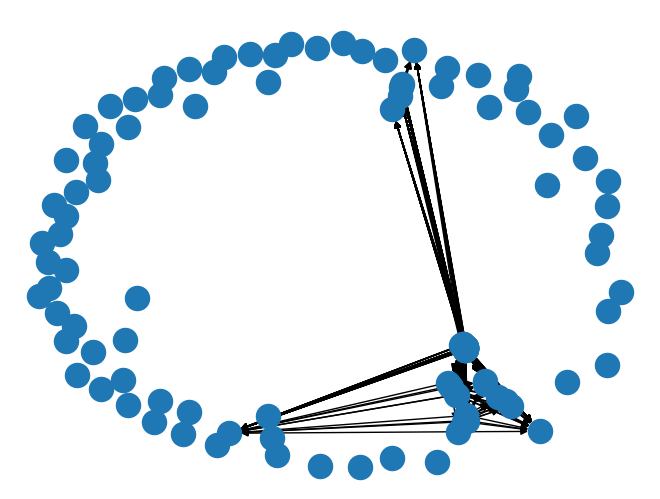

In [ ]:
nx.draw(graphs[3])

In [ ]:
newlist

[Data(x=[72, 1], edge_index=[2, 2195], y=[1], edge_weight=[2195, 1]),
 Data(x=[72, 1], edge_index=[2, 2178], y=[1], edge_weight=[2178, 1]),
 Data(x=[72, 1], edge_index=[2, 1240], y=[1], edge_weight=[1240, 1]),
 Data(x=[72, 1], edge_index=[2, 1934], y=[1], edge_weight=[1934, 1]),
 Data(x=[72, 1], edge_index=[2, 2103], y=[1], edge_weight=[2103, 1]),
 Data(x=[72, 1], edge_index=[2, 2166], y=[1], edge_weight=[2166, 1]),
 Data(x=[72, 1], edge_index=[2, 1800], y=[1], edge_weight=[1800, 1]),
 Data(x=[72, 1], edge_index=[2, 2010], y=[1], edge_weight=[2010, 1]),
 Data(x=[72, 1], edge_index=[2, 1793], y=[1], edge_weight=[1793, 1]),
 Data(x=[72, 1], edge_index=[2, 1835], y=[1], edge_weight=[1835, 1]),
 Data(x=[72, 1], edge_index=[2, 2556], y=[1], edge_weight=[2556, 1]),
 Data(x=[72, 1], edge_index=[2, 2556], y=[1], edge_weight=[2556, 1]),
 Data(x=[72, 1], edge_index=[2, 2195], y=[1], edge_weight=[2195, 1]),
 Data(x=[72, 1], edge_index=[2, 1372], y=[1], edge_weight=[1372, 1]),
 Data(x=[72, 1], edg

In [ ]:
import random
torch.manual_seed(12345)
random.shuffle(newlist)
train_dataset = newlist[:350]
test_dataset = newlist[350:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 350
Number of test graphs: 256


In [ ]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 5)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(1, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=5, bias=True)
)


In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 1501):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 002, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 003, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 004, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 005, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 006, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 007, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 008, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 009, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 010, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 011, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 012, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 013, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 014, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 015, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 016, Train Acc: 0.2914, Test Acc: 0.3203
Epoch: 017, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 018, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 019, Train Acc: 0.5857, Test Acc: 0.5781
Epoch: 020, Train Acc: 0.2943, Test Acc: 0.3242
Epoch: 021, Train Acc: 0.2914, Test Acc: